# ABM: Residential segregation mechanim

The segregation mechanism is an adaptation of Schelling's segregation model. 


Agents live in neighborhoods. At rate *t*, agents decide whether to move or stay in their neighborhood based on the proportion of people within the same quintile of income (e.g., 5 groups of income). Agents have a tolerance threshold (e.g., 20%) of people in the same quintile of income living in the same neighborhood. If the proportion of people of that quintile is lower than the tolerance threshold, agents move to another neighborhood **chosen randomly** from a pool of neighborhood that has not reach its population limit (e.g., more than 30% its original size).

Changes in segregation are very sensitive to changes in the values of parameters and number of income groups. In this example, I use: 

- 20 neighbors with an initial population of 100 agents.
- 5 income groups.
- Population limit by neighborhood of 1.30 * 100.
- Moving rate is 0.1 per year.
- 100 replicates for each scenario.  
- Income distribution comes from CPS data. 

To measure segregation I use the **neighborhood sorting index or NSI** (Jargowsky's 1996), that compares the income variation across all neighborhoods in a metro area with the income variation across all households in that metro area. If households are segregated across neighborhoods by income, the income variation across
neighborhoods will be similar to the income variation across households, and the NSI will equal almost 1. If all neighborhoods are perfectly economically integrated (i.e., each neighborhood is a microcosm of the entire metro area) the NSI will be almost 0. Because the NSI is based on relative variances in income, measured income segregation will be influenced by the metro areas’ overall inequality. I also use the **average proportion of similar agents**. 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pysdaza as sd
%matplotlib inline

: 

In [73]:
# examining some data
ind = sd.read_files('../output/example01/indiv*.csv')
agg = sd.read_files('../output/example01/aggregate_data*.csv')

The income distribution looks as expected and the average Gini coefficient of this distribution is 0.36. 

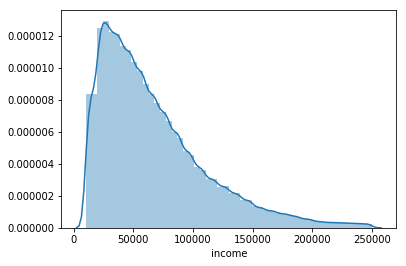

In [74]:
# income distribution from all replicates
sns.distplot(ind.income);

In [75]:
print('Gini', round(agg.gini.mean(),2), 'SD =', round(agg.gini.std(), 4))

Gini 0.36 SD = 0.0046


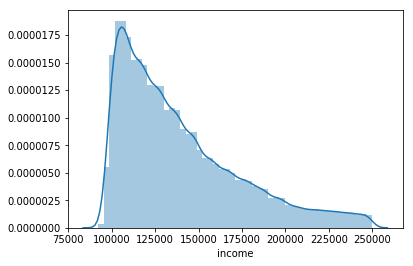

In [76]:
# income distribution highest quintile
sns.distplot(ind.loc[ind.quintile==5, 'income']);

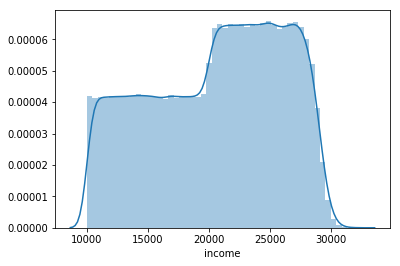

In [77]:
# income distribution lower quintile
sns.distplot(ind.loc[ind.quintile==1, 'income']);

# Segregation measures

Most of replicates (73%) reach convergence (all agents satisfy the moving threshold).

In [78]:
(agg.unhappy==0).value_counts()

True     583
False    217
Name: unhappy, dtype: int64

NSI changes dramatically due to small changes in the moving threshold. In other words, segregation is very sensitive to changes in the moving threshold. This is related to the way the segregation model is implemented and the number of groups (income quintiles). Standard deviation is between 0.04 and 0.09. So there is about 7% of the variability of segregation due to the stochasticity of the simulation. 

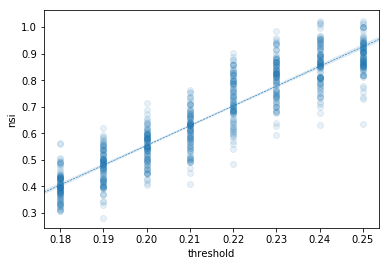

In [79]:
sns.regplot(agg['threshold'], agg['nsi'], scatter_kws={'alpha':.10}, line_kws={'linestyle':'--', 'linewidth':0.6});

In [80]:
agg_group = agg.groupby('iter')
agg_group.nsi.mean() # mean

iter
1    0.402524
2    0.473832
3    0.548531
4    0.611097
5    0.731174
6    0.809421
7    0.858013
8    0.891403
Name: nsi, dtype: float64

In [81]:
# standard deviation
agg_group.nsi.std()

iter
1    0.053013
2    0.065235
3    0.063023
4    0.073683
5    0.088100
6    0.079391
7    0.078770
8    0.064671
Name: nsi, dtype: float64

I obtain similar results when observing the proportion of neighbors of similar income quintile. This time, variability increases with the moving threshold. That is, when the moving threshold is higher it becomes more difficult to satisfy that threshold and there is a higher chance agents will move, increasing the variability of similarity. This is confirmed by the plot of moving threshold and number of unhappy agent (i.e., who hasn't satisfied that threshold). The variability of **NSI** is more robust to higher thresholds. 

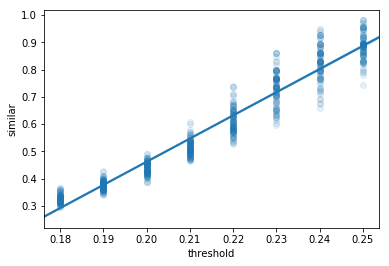

In [82]:
sns.regplot(agg['threshold'], agg['similar'], scatter_kws={'alpha':0.1});

In [83]:
agg_group.similar.std()

iter
1    0.015183
2    0.017383
3    0.022872
4    0.029448
5    0.047416
6    0.062624
7    0.065523
8    0.048109
Name: similar, dtype: float64

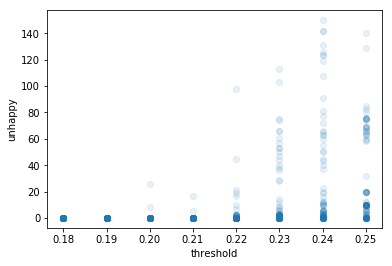

In [84]:
sns.regplot(agg['threshold'], agg['unhappy'], fit_reg=False, scatter_kws={'alpha':0.1});

In sum, the segregation mechanism seems to work properly. 